# **GOAL:** To Identify **Customer Segments** For Online Retail With The Use Of **K-Means Clustering**.

---
## 1. IMPORTING LIBRARIES
---

In [145]:
# import base libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

---
## 2. LOADING THE DATASET
---

In [147]:
# laod the dataset
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [148]:
# look at the complete dataset
print(f"Shape of data: {df.shape}\n")

# info
df.info()

Shape of data: (541909, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**CONCLUSION:**
* There are 541909 rows and 8 columns before cleaning.
* 'InvoiceNo' consists of invoice ID of the transaction.
* 'StockCode' consists of stock ID.
* 'Description' consists of details about the stock being bought.
* 'Quantity' consists of the quantity bought.
* 'InvoiceDate' is the date and time of the invoice generation.
* 'UnitPrice' is the unit price of the product being bought.
* 'CustomerID' is the unique ID allotted to the customer.
* 'Country' specifies the country of the customer.

In [150]:
# description
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,541909.0,25900.0,573585.0,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,NaN,NaN,NaN,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## 3. DATA CLEANING
---

In [152]:
# check duplicate rows
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [153]:
# duplicate rows percentage
print(f"Percentage of duplicate rows:{(5268/len(df)) * 100}")

# NOTE: about 1%.

Percentage of duplicate rows:0.9721189350979592


In [154]:
# drop duplicates
df.drop_duplicates(inplace=True)

print("Info after dropping the duplicate rows:\n")
df.info()

Info after dropping the duplicate rows:

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


**CONCLUSION:**
* After dropping the duplicate rows, 536641 total rows remain.

In [156]:
# look at null values
print("The null values are:")
print(df.isna().sum(), "\n")

# look at null value percentage
print("The null value percentages are:")
df.isna().mean() * 100

The null values are:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64 

The null value percentages are:


InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

**CONCLUSION:**
* 'Description' and 'CustomerID' have null values.
* For 'Description' column, as null values are <1%, we will drop those rows.

In [158]:
# drop null value rows of 'Description' column
df = df.dropna(subset='Description')
print(df.info())

# look at the null values again
print("\nNull values after cleaning 'Description' column:")
print(df.isna().sum())

# look at the null value percentages again
print("\nNow the null value percentages are:")
df.isna().mean() * 100

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      535187 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.7+ MB
None

Null values after cleaning 'Description' column:
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133583
Country             0
dtype: int64

Now the null value percentages are:


InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.960061
Country         0.000000
dtype: float64

**CONCLUSION:**
* Total rows now: 535187.
* Only 'CustomerID' column left to clean next.

In [160]:
# check all the unique elements in each column
for column in df.columns:
    print("*" * 30)
    print(f"The unique values in '{column}' is:")
    print(df[column].unique())
    print(f"The count of unique values in '{column}' is:")
    print(df[column].nunique())
    print("*" * 30, "\n")

******************************
The unique values in 'InvoiceNo' is:
[536365 536366 536367 ... 581585 581586 581587]
The count of unique values in 'InvoiceNo' is:
24446
****************************** 

******************************
The unique values in 'StockCode' is:
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
The count of unique values in 'StockCode' is:
3958
****************************** 

******************************
The unique values in 'Description' is:
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
The count of unique values in 'Description' is:
4223
****************************** 

******************************
The unique values in 'Quantity' is:
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    2

**CONCLUSION:**
* There are thousands of unique values in each columns except 'Country', so we **can't** look at it manually.
* Also, 'Quantity' has negative values which needs to be further investigated.

In [162]:
# check unique products with negative quantities
negative_quantity_df = df[df['Quantity'] < 0]
negative_product_group = negative_quantity_df.groupby('Description')['Quantity'].sum()
print(negative_product_group, "\n")

# check the invoices of the associated quantity
negative_quantity_df = df[df['Quantity'] < 0]
negative_quantity_invoice_group = negative_quantity_df.groupby('InvoiceNo')['Quantity'].sum()
print(negative_quantity_invoice_group, "\n")

# seperating the invoices
# separate positive and negative quantities
normal_invoices = df[df['Quantity'] > 0]
return_invoices = df[df['Quantity'] < 0]

# display first few rows of normal and return invoices
print("*" * 100)
print("Normal Invoices:")
print(f"Total normal invoices: {len(normal_invoices)}")
print(normal_invoices[["InvoiceNo", "Description", "Quantity"]].head(), "\n")

print("*" * 100)
print("Return/Cancelled Invoices:")
print(f"Total return/cancel invoices: {len(return_invoices)}")
print(return_invoices[["InvoiceNo", "Description", "Quantity"]].head())

Description
20713                               -400
 50'S CHRISTMAS GIFT BAG LARGE        -2
 DOLLY GIRL BEAKER                    -7
 OVAL WALL MIRROR DIAMANTE            -5
 SET 2 TEA TOWELS I LOVE LONDON       -8
                                    ... 
wrongly coded-23343                 -800
wrongly marked carton 22804         -256
wrongly marked. 23343 in box       -3100
wrongly sold as sets                -600
wrongly sold sets                   -975
Name: Quantity, Length: 2110, dtype: int64 

InvoiceNo
537032       -30
537425       -20
537426       -35
537432       -43
538072       -13
           ...  
C581484   -80995
C581490      -23
C581499       -1
C581568       -5
C581569       -6
Name: Quantity, Length: 4310, dtype: int64 

****************************************************************************************************
Normal Invoices:
Total normal invoices: 525462
  InvoiceNo                          Description  Quantity
0    536365   WHITE HANGING HEART T-LIGHT H

In [163]:
# ratio of cancelled invoice vs normal invoice
(9725/525462)

0.01850752290365431

**CONCLUSION:**
* The normal invoices (525462) have integer values while the cancelled/returned invoice starts with 'C' (9725) . As it is very small in quantity (about ratio of 0.018), we will drop it.

In [165]:
# drop the negative quantity
df = df[df["Quantity"]>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525462 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    525462 non-null  object        
 1   StockCode    525462 non-null  object        
 2   Description  525462 non-null  object        
 3   Quantity     525462 non-null  int64         
 4   InvoiceDate  525462 non-null  datetime64[ns]
 5   UnitPrice    525462 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      525462 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.1+ MB


In [166]:
# look at the negative quantities again
df[df["Quantity"]<0]

# so, there isn't any negative quantities.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [167]:
# drop the null values of 'CustomerID'
df = df.dropna(subset="CustomerID")

# look at the null values again
print(f"Checking for any null values: {df.isna().sum()}\n")

# shape of data
print(f"Now, shape of dataset: {df.shape}")

Checking for any null values: InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Now, shape of dataset: (392732, 8)


**CONCLUSION:**
* The 'CustomerID' column needs to be non-null for Customer Segmentation, so we will drop the null rows here which will reduce our data to about 75%(400000) which is still substantial. This will ensure that K means clustering analysis of the customers find valuable data in 'CustomerID'.
* Finally, data is cleaned and we can move to standardisation and other preprocessing.

---
## 4. DATA TYPE CONVERSION
---

In [170]:
# changing datatype of 'CustomerID' to relevant int64 type
df["CustomerID"] = df["CustomerID"].astype('int64')

# look at info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


In [171]:
# changing datatype of 'InvoiceNo'
df["InvoiceNo"] = df["InvoiceNo"].astype('int64')

# look at info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  int64         
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.0+ MB


In [172]:
# look at 0 unit price
print(len(df[df["UnitPrice"]==0]))
df[df["UnitPrice"]==0]


40


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410,United Kingdom


In [173]:
# drop the rows with 'UnitPrice'=0
df = df[df["UnitPrice"]>0]

# check again
df.sort_values(by="UnitPrice")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405,United Kingdom
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952,United Kingdom
286813,562044,16045,POPART WOODEN PENCILS ASST,100,2011-08-02 10:24:00,0.040,16607,United Kingdom
...,...,...,...,...,...,...,...,...
374542,569382,M,Manual,1,2011-10-03 16:44:00,3155.950,15502,United Kingdom
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.320,12744,Singapore
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.060,12536,France
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.060,12536,France


**CONCLUSION:**
* As the 0 unit price doesn't make much sense, and more than that, it is just 40 rows, so we dropped them.

In [175]:
# look at the dataset again
print(df.info(), "\n")

# look at the null values
print("Final check of null values:")
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  int64         
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.0+ MB
None 

Final check of null values:


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

---
## 5. FEATURE ENGINEERING
---

**NOTE:** We can do RFM (Recency, Frequency and Monetary) analysis for which we need to create new features.

In [178]:
# create recency
latest_date = df["InvoiceDate"].max()
df["Recency"] = (latest_date - df["InvoiceDate"]).dt.days
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373


In [179]:
# create monetary (total money spent)
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34


In [180]:
# create frequency
frequency_df = df.groupby("CustomerID")["InvoiceNo"].nunique()
print("The count of invoice of each customer is:")
print(frequency_df)

# merging the frequency_df
df = pd.merge(df, frequency_df, on="CustomerID", how="left")

df.head()

The count of invoice of each customer is:
CustomerID
12346     1
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     2
18283    16
18287     3
Name: InvoiceNo, Length: 4338, dtype: int64


,InvoiceNo_x,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,TotalPrice,InvoiceNo_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373,15.30,34
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373,22.00,34
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34


In [181]:
# renaming the columns
df.rename({"InvoiceNo_x": "InvoiceNo", "InvoiceNo_y": "Frequency"}, inplace=True, axis=1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,TotalPrice,Frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373,15.30,34
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373,22.00,34
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34


In [182]:
# look at the columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Recency', 'TotalPrice',
       'Frequency'],
      dtype='object')

## 6. FEATURE SELECTION

In [184]:
features = ["TotalPrice", "Frequency", "Recency", "Quantity", "UnitPrice"]

# initialise scaler
scaler = StandardScaler()

# fit and transform
scaled = scaler.fit_transform(df[features])

# convert back to dataframe
scaled_df = pd.DataFrame(scaled, columns=df[features].columns)

scaled_df

,TotalPrice,Frequency,Recency,Quantity,UnitPrice
0,-0.023566,0.407949,1.968167,-0.039446,-0.025893
1,-0.007366,0.407949,1.968167,-0.039446,0.011873
2,-0.002030,0.407949,1.968167,-0.028365,-0.016901
3,-0.007366,0.407949,1.968167,-0.039446,0.011873
4,-0.007366,0.407949,1.968167,-0.039446,0.011873
...,...,...,...,...,...
392687,-0.039960,-0.396488,-1.341756,-0.006204,-0.102326
392688,-0.032245,-0.396488,-1.341756,-0.039446,-0.046125
392689,-0.019388,-0.396488,-1.341756,-0.050527,0.046043
392690,-0.019388,-0.396488,-1.341756,-0.050527,0.046043


In [185]:
scaled_df_train, scaled_df_test = train_test_split(scaled_df, test_size=0.2, random_state=17)

**CONCLUSION:**
* All the columns look good and ready for next step.

## 7. MODEL CREATION

#### FINDING OPTIMAL k USING ELBOW METHOD

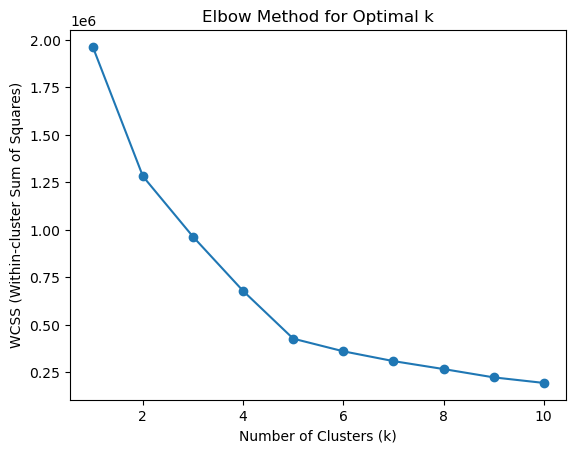

In [189]:
# determine the optimal cluster using elbow method
# initialize a list to store the within-cluster sum of squares (WCSS)
wcss = []

# try different numbers of clusters (k = 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=17)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to centroids

# plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

**CONCLUSION:**
* We can see from the graph that the elbow is at 5.

In [191]:
# from the graph above optimal k is 5
optimal_k = 5

# apply K-means clustering with optimal k (k = 5)
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=17)
kmeans.fit(scaled_df)

# Get the cluster labels
labels = kmeans.labels_


#### ASSIGNING CLUSTER COLUMN TO THE ORIGINAL DATASET

In [193]:
# assigning cluster labels to the oridinal df
df['Cluster'] = labels
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,TotalPrice,Frequency,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373,15.30,34,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373,22.00,34,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34,0


#### VISUALIZING USING 2D AND 3D PCA PLOT

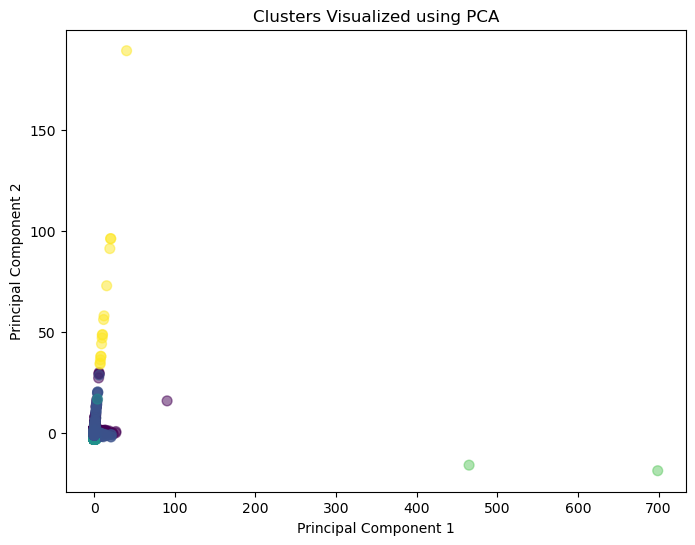

In [195]:

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', s=50, alpha=0.5)
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**CONCLUSION:**
* The clusters visually looks well seperated.

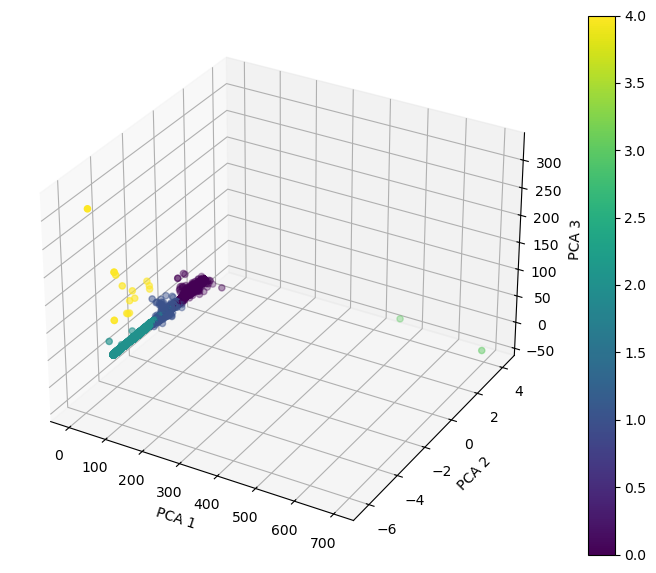

In [199]:
# create the copy of scaled_df for visual
pca_df = scaled_df.copy()

# assign cluster column
pca_df['Cluster'] = labels

# create a 3d plot
pca = PCA(n_components=3)
X_pca = pca.fit_transform(pca_df)

# Step 3: add the PCA components to dataframe
pca_df['PCA1'] = X_pca[:, 0]
pca_df['PCA2'] = X_pca[:, 1]
pca_df['PCA3'] = X_pca[:, 2]

# Step 4: Plot the 3D scatter plot of the PCA components with the cluster labels
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the points with colors based on the cluster labels
scatter = ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c=pca_df['Cluster'], cmap='viridis')

# Labeling the axes
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Add a color bar to indicate the cluster labels
fig.colorbar(scatter, ax=ax)

plt.show()

In [201]:
# check inertia
kmeans.inertia_

427663.8017883783

In [203]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(scaled_df, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_index}')  # Lower is better

Davies-Bouldin Index: 0.5201793022314318


**CONCLUSION:**
* As Davies-Bouldin Index is lower than 1, it seems to be an good model.

## 8. INTERPRETATION

#### GETTING SUMMARY STATISTICS

In [205]:
numerical_columns = ['Quantity', 'UnitPrice', 'Recency', 'TotalPrice', 'Frequency', 'Cluster']

# Grouping by 'Cluster' and calculating mean, median, and std for numerical columns
cluster_summary = df[numerical_columns].groupby('Cluster')[numerical_columns].agg(['mean', 'median', 'std'])

# Display the summary statistics
cluster_summary

Quantity                          UnitPrice            \
                 mean   median          std         mean    median   
Cluster                                                              
0           13.377964      6.0    47.867173     3.207173     1.950   
1           12.716810      6.0    41.142126     2.875766     1.690   
2            8.440620      2.0    19.752104     2.934408     1.650   
3        77605.000000  77605.0  4794.183976     1.560000     1.560   
4            1.000000      1.0     0.000000  2782.909375  2085.905   

                         Recency                        TotalPrice  \
                 std        mean median         std           mean   
Cluster                                                              
0           9.435192  267.171442  263.0   61.852830      23.405528   
1           7.408654   66.052917   59.0   46.286373      21.636476   
2           7.415908  136.119182  116.0  106.792942      14.094666   
3           0.735391  162.500000  162.5  229.809704  122826.600000   
4        1706.158796  124.875000   75.0  104.972933    2782.909375   

                                    Frequency                   Cluster  \
             median           std        mean median        std    mean   
Cluster                                                                   
0            13.200    124.067042   11.529641    7.0  13.779953     0.0   
1            11.800     70.856685    9.426994    6.0  10.560569     1.0   
2             5.900     27.937993  150.598826  124.0  47.909547     2.0   
3        122826.600  64548.949627    1.500000    1.5   0.707107     3.0   
4          2085.905   1706.158796   36.625000   11.0  65.728609     4.0   

                     
        median  std  
Cluster              
0          0.0  0.0  
1          1.0  0.0  
2          2.0  0.0  
3          3.0  0.0  
4          4.0  0.0

#### CREATING BASIC CLUSTER SUMMARY USING MEDIAN FOR INTERPRETATION

In [207]:
basic_cluster_summary = df[numerical_columns].groupby('Cluster')[numerical_columns].median()
basic_cluster_summary

,Quantity,UnitPrice,Recency,TotalPrice,Frequency,Cluster
Cluster,,,,,,
0,6.0,1.950,263.0,13.200,7.0,0.0
1,6.0,1.690,59.0,11.800,6.0,1.0
2,2.0,1.650,116.0,5.900,124.0,2.0
3,77605.0,1.560,162.5,122826.600,1.5,3.0
4,1.0,2085.905,75.0,2085.905,11.0,4.0


**CONCLUSION:**
* Cluster 0 (Inactive Buyers) :- These customers haven't bought for longer periods(large Recency) and have low TotalPrice indicating Inactive and lapsed buyers.
* Cluster 1 (New Buyers) :- These customers are recent but low value buyers, probably new customers.
* Cluster 2 (Loyal Buyers) :- These customers have highest frequency and quite good recency indicating that they are the loyal frequent customers.
* Cluster 3 (Bulk Buyers) :- These customers buy after moderate duration, in low frequency but with huge quantity, so they must be resellers.
* Cluster 4 (Luxury Buyers) :- These customers are moderately frequent but they are ones who buy huge value products and quite recent too, so quite active and huge spender. These can be promoted as priviledged customers.

#### ASSIGNING CLUSTER LABEL TO THE **ORIGINAL** DATASET

In [210]:
# grouping the clusters and countries

# convert the 'Cluster column to proper name
def label_func(column):
    if column==0:
        return "Inactive Buyer"
    elif column==1:
        return "New Buyer"
    elif column==2:
        return "Loyal Buyer"
    elif column==3:
        return "Bulk Buyer"
    elif column==4:
        return "Luxury Buyer"

df["ClusterLabel"] = df["Cluster"].apply(label_func)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,TotalPrice,Frequency,Cluster,ClusterLabel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373,15.30,34,0,Inactive Buyer
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34,0,Inactive Buyer
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373,22.00,34,0,Inactive Buyer
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34,0,Inactive Buyer
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373,20.34,34,0,Inactive Buyer


#### INTERPRETING BASED ON COUNTRY

In [249]:
import random

cluster_label_df = df.copy()

# checking details for different countries
country_list = df["Country"].unique()

random_country = random.choice(country_list)

print(f"For {random_country}:")
cluster_label_df[cluster_label_df["Country"]==random_country].groupby("Cluster")["ClusterLabel"].value_counts().reset_index()


For United Kingdom:


,Cluster,ClusterLabel,count
0,0,Inactive Buyer,141183
1,1,New Buyer,190000
2,2,Loyal Buyer,18010
3,3,Bulk Buyer,2
4,4,Luxury Buyer,8


In [214]:
# Statistical summary based on country
grouped_by_country = df.groupby('Country').agg({
    'Quantity': 'sum',   # Sum of 'Quantity' for each country
    'UnitPrice': 'mean', # Average 'UnitPrice' for each country
    'Recency': 'mean',   # Average 'Recency' for each country
    'TotalPrice': 'sum', # Sum of 'TotalPrice' for each country
    'Frequency': 'mean'  # Average 'Frequency' for each country
})

# To reset the index and get a clean DataFrame
grouped_by_country.reset_index(inplace=True)

# Display the grouped DataFrame
grouped_by_country

,Country,Quantity,UnitPrice,Recency,TotalPrice,Frequency
0,Australia,83891,3.053133,185.091448,138453.810,15.963590
1,Austria,4881,4.256030,132.718593,10198.680,2.243719
2,Bahrain,260,4.644118,210.647059,548.400,1.000000
3,Belgium,23237,3.630158,150.168390,41196.340,6.073855
4,Brazil,356,4.456250,238.000000,1143.600,1.000000
5,Canada,2763,6.030331,165.675497,3666.380,2.788079
6,Channel Islands,9485,4.535475,162.309237,20440.540,5.262383
7,Cyprus,6340,5.748176,190.194030,13502.850,3.409619
8,Czech Republic,671,3.130800,195.600000,826.740,2.000000
9,Denmark,8235,3.146184,135.365789,18955.340,2.655263


In [216]:
# Top 3 highest quantity country
grouped_by_country.sort_values(by="Quantity", ascending=False).head(3)

,Country,Quantity,UnitPrice,Recency,TotalPrice,Frequency
35,United Kingdom,4241305,2.972328,150.854792,7285024.644,16.448375
23,Netherlands,200361,2.648465,162.854599,285446.340,64.677830
10,EIRE,140133,4.447130,140.406864,265262.460,168.424993


**CONCLUSION:**
* The maximum buying quantity is from UK, followed by Netherlands and EIRE (Ireland).

In [218]:
# Top 3 highest unitprice buyer
grouped_by_country.sort_values(by="UnitPrice", ascending=False).head(3)

,Country,Quantity,UnitPrice,Recency,TotalPrice,Frequency
29,Singapore,5241,58.333288,200.675676,21279.29,7.000000
5,Canada,2763,6.030331,165.675497,3666.38,2.788079
26,Portugal,16095,5.943861,153.106676,33375.84,6.222299


**CONCLUSION:**
* The highest UnitPrice is from Singapore, Canada and Portugal respectively.

In [220]:
# Top 3 Latest buyers
grouped_by_country.sort_values(by="Recency", ascending=True).head(3)

,Country,Quantity,UnitPrice,Recency,TotalPrice,Frequency
27,RSA,351,4.352632,57.000000,1002.31,1.000000
33,USA,2458,2.308939,69.262570,3580.39,1.251397
17,Israel,4043,3.667714,122.734694,7215.84,1.302041


**CONCLUSION:**
* The top 3 recent buyers are from RSA (Republic of South Africa), USA and Israel.

In [223]:
# Top 3 maximum earning from the country
grouped_by_country.sort_values(by="TotalPrice", ascending=False).head(3)

,Country,Quantity,UnitPrice,Recency,TotalPrice,Frequency
35,United Kingdom,4241305,2.972328,150.854792,7285024.644,16.448375
23,Netherlands,200361,2.648465,162.854599,285446.340,64.677830
10,EIRE,140133,4.447130,140.406864,265262.460,168.424993


**CONCLUSION:**
* Top 3 countries from where the revenue is generated are UK, Netherland and Ireland.

In [226]:
# Top 3 frequent visitors
grouped_by_country.sort_values(by="Frequency", ascending=False).head(3)

,Country,Quantity,UnitPrice,Recency,TotalPrice,Frequency
10,EIRE,140133,4.447130,140.406864,265262.460,168.424993
23,Netherlands,200361,2.648465,162.854599,285446.340,64.677830
35,United Kingdom,4241305,2.972328,150.854792,7285024.644,16.448375


**CONCLUSION:**
* The top 3 frequent visitor of the website are Ireland, Netherlands and United Kingdom.